In [ ]:
#import necessary library
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns   
import os 

# reading data from google drive and local drive 
data = pd.read_csv("C:/Users/TNT NEPAL/OneDrive/Desktop/portfoilo project/data/raw/Global_Superstore2.csv", encoding="latin1")
print(data.head(5))

# reading data from google drive 
# file_id = "1_IjV5ekrZDNcn55IoXCY9tVJkSfkgKqd"
# url =f"https://drive.google.com/uc?id={file_id}"
# data = pd.read_csv(url, encoding='latin1') 
# i used latin1 because it avoid the UnicodeDecodeError!
# print(data.head())

In [ ]:
# Check for Missing Values 
print(data.isnull().sum())


In [ ]:
#check Data types 
print(data.dtypes)

In [ ]:
# Show summary info
print(data.info())

In [ ]:
#Remove Duplicates 
data.drop_duplicates()

In [ ]:
#Checking for negative values where they shouldn’t exist 
# sales value cannot be negative
print(data['Sales'].describe())


In [ ]:
# check for Outlier
# Outliers can indicate incorrect entries, data entry errors, or extreme cases. 
sns.boxplot(x=data['Profit'])
plt.show()


In [ ]:
# find the outlier using the IQR (Interquartile Range)
# It finds minum and maximum values based on statistical rules.
Q1 = data['Profit'].quantile(0.25)
Q3 = data['Profit'].quantile(0.75)
IQR = Q3-Q1
min = Q1-1.5*IQR
max = Q3+1.5*IQR
outliers = data[(data['Profit'] < min)|(data['Profit'] > max)]
outliers

In [ ]:
#remove Outliers
data_clean = data[(data['Profit']>=min) & (data['Profit']<=max)]

In [ ]:
# outlier replace with median 
median_value = data['Profit'].median()
data['Profit'] = np.where((data['Profit'] < min) | (data['Profit'] > max),median_value,data['Profit'])


In [ ]:
# check for Outlier after clean the outlier 
sns.boxplot(x=data_clean['Profit'])
plt.show()

In [ ]:
# column with too many missing values 
missing_values_percent = data.isnull().sum()/len(data)*100
print(missing_values_percent)
data = data.loc[:, missing_values_percent < 70]

In [ ]:
# Cleaning the data
categorical_column = data.select_dtypes(include=['object','category']).columns
print("Categorical Column:", categorical_column)

In [ ]:
# Check unique values and counts
for column in categorical_column:
    print(f"\nColumn:{column}")
    print(data[column].value_counts())
# it gives all unique labels and how many time each label appears 


In [ ]:
#clean categorical column 
for column in categorical_column:
    data[column] = data[column].astype(str).str.strip().str.lower()

#data after cleaning the categorical column
for column in categorical_column:
    print(f"\n column:{column} (after cleaning)")
    print(data[column].value_counts())

In [ ]:
# accumulate all object type columns
object_columns = data.select_dtypes(include='object').columns.tolist()
# print(object_columns)
# Remove unwanted spaces and character from object columns
for column in object_columns:
    data[column] = data[column].astype(str).str.strip()
print(data[['Order ID', 'Customer Name', 'Ship Mode']].head())



In [ ]:
#clean the data
data['Order Date']= pd.to_datetime(data['Order Date'], format='%y.%m.%d',errors='coerce',)
data['Ship Date']= pd.to_datetime(data['Ship Date'],format='%y.%m.%d', errors='coerce')
data['year'] = data['Order Date'].dt.year
data['month'] = data['Order Date'].dt.month
data['day'] = data['Order Date'].dt.day 
data['profit_margin'] = data['Profit']/data['Sales']*100
data['shipping_delay'] = (data['Ship Date'] - data['Order Date']).dt.days
data['shipping_delay'] = data['shipping_delay'].apply(lambda x: x if x >= 0 else 0)
print(data.head())

In [ ]:
# Create directory to save cleaned data
folder = r"C:/Users/TNT NEPAL/OneDrive/Desktop/portfoilo project/data/cleaned_data"
os.makedirs(folder, exist_ok=True)

# save the data after cleaning 
data.to_csv("C:/Users/TNT NEPAL/OneDrive/Desktop/portfoilo project/data/cleaned_data/Global_superstor2_cleaned.csv", index=False)


In [ ]:
# validate the cleaned data 
data['Order Date']= pd.to_datetime(data['Order Date'],format='%y.%m.%d', errors='coerce',)
data['Ship Date']= pd.to_datetime(data['Ship Date'],format='%y.%m.%d', errors='coerce')   
data['year'] = data['Order Date'].dt.year
data['month'] = data['Order Date'].dt.month
data['day'] = data['Order Date'].dt.day


In [ ]:
#checking date min and max date reange after cleaning 
print("Order Date Range:", data['Order Date'].min(), "→", data['Order Date'].max())
print("Ship Date Range:", data['Ship Date'].min(), "→", data['Ship Date'].max())


In [ ]:
# check missing values in data 
data['Order Date'].isna().sum()
data['Ship Date'].isna().sum()


In [ ]:
# Ship Date occurs before Order Date  or not 
invalid_dates = data[data['Ship Date'] < data['Order Date']]
invalid_dates
# in real life it should not happen


In [ ]:
# check invalid category values 
for column in categorical_column:   
    invalid_values = data[~data[column].isin(data[column].value_counts().index)]
   # print(f"\nInvalid values in column {column}:")
    #print(invalid_values)
for col in categorical_column:
    print(f"\nColumn: {col}")
    print(data[col].unique())

In [ ]:
# EXPLORATORY DATA ANALYSIS (EDA)
# total sales in yrear 
total_sales_per_year = data.groupby('year')['Sales'].sum().reset_index()
print(total_sales_per_year)
# total sales per month
total_sales_per_month = data.groupby('month')['Sales'].sum().reset_index()
print(total_sales_per_month)
# total sales per day 
total_sales_per_day = data.groupby('day')['Sales'].sum().reset_index()
print(total_sales_per_day)
# total sales per category
total_sales_per_category = data.groupby('Category')['Sales'].sum().reset_index()        
print(total_sales_per_category)
#sales trend over time 
data['Order Date'] = pd.to_datetime(data['Order Date'])
sales_trend = data.groupby('Order Date')['Sales'].sum().reset_index()   
print(sales_trend)
# visualize sales trend
plt.figure(figsize=(12,6))  
plt.plot(sales_trend['Order Date'], sales_trend['Sales'])
plt.title('Sales Trend Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.show()

            Region         Sales
0           Africa  7.837732e+05
1           Canada  6.692817e+04
2        Caribbean  3.242809e+05
3          Central  2.822303e+06
4     Central Asia  7.528266e+05
5             EMEA  8.061613e+05
6             East  6.787812e+05
7            North  1.248166e+06
8       North Asia  8.483098e+05
9          Oceania  1.100185e+06
10           South  1.600907e+06
11  Southeast Asia  8.844232e+05
12            West  7.254578e+05


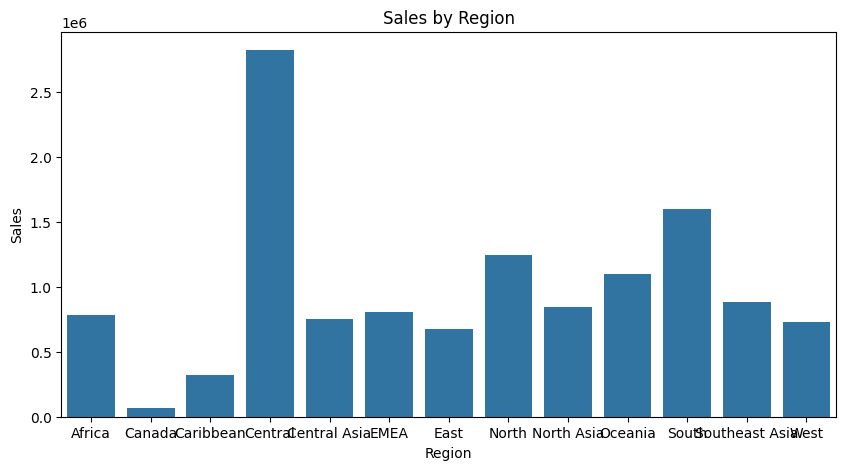

               City         Sales
2290  New York City  256368.16100
1910    Los Angeles  175851.34100
1996         Manila  120886.94850
2936        Seattle  119540.74200
2843  San Francisco  112669.09200
2499   Philadelphia  109077.01300
3107         Sydney  101945.51700
1508        Jakarta   94321.32420
1895         London   86945.80500
2106    Mexico City   85728.55176


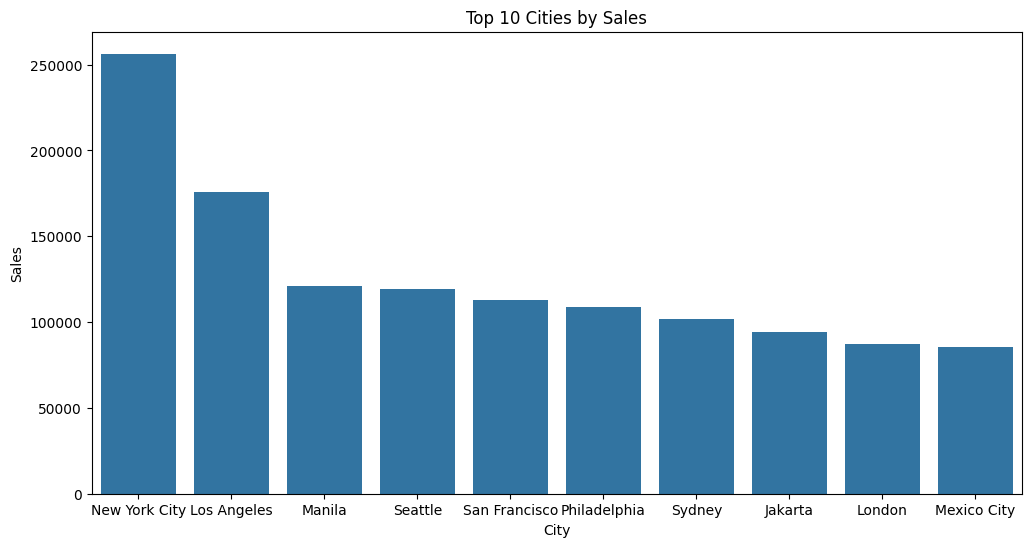

In [49]:
# sales by region
sales_by_region = data.groupby('Region')['Sales'].sum().reset_index()
print(sales_by_region)  
# visualize sales by region
plt.figure(figsize=(10,5))      
sns.barplot(x='Region', y='Sales', data=sales_by_region)
plt.title('Sales by Region')
plt.show()
# sales by city
sales_by_city = data.groupby('City')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False).head(10)
print(sales_by_city)
# visualize sales by city
plt.figure(figsize=(12,6))      
sns.barplot(x='City', y='Sales', data=sales_by_city)
plt.title('Top 10 Cities by Sales')
plt.show()

In [50]:
# profit analysis
# total profit per year 
total_profit_per_year = data.groupby('year')['Profit'].sum().reset_index()
print(total_profit_per_year)    
# total profit per month    
total_profit_per_month = data.groupby('month')['Profit'].sum().reset_index()
print(total_profit_per_month)
# total profit per day
total_profit_per_day = data.groupby('day')['Profit'].sum().reset_index()
print(total_profit_per_day)

   year        Profit
0  2011  248940.81154
1  2012  307415.27910
2  2013  406935.23018
3  2014  504165.97046
    month        Profit
0       1   73535.38454
1       2   70932.19922
2       3   94087.52096
3       4   73513.63124
4       5  104509.78428
5       6  147079.41684
6       7   78070.09172
7       8  151854.10972
8       9  170438.18316
9      10  157269.35838
10     11  175449.48412
11     12  170718.12710
    day       Profit
0     1  43292.88918
1     2  56669.78350
2     3  57520.51520
3     4  48039.73208
4     5  41944.40700
5     6  55026.54906
6     7  44295.96250
7     8  51722.51878
8     9  32883.60236
9    10  39380.21042
10   11  48436.75120
11   12  56901.83892
12   13  39568.74546
13   14  53146.03840
14   15  37928.55646
15   16  62536.15782
16   17  48877.02566
17   18  52951.61728
18   19  45201.96354
19   20  52720.26282
20   21  46225.81148
21   22  52072.19230
22   23  46908.89206
23   24  59549.55274
24   25  50783.46400
25   26  30091.52602
26   27  63

       Row ID         Order ID Order Date  Ship Date       Ship Mode  \
1       26341    IN-2013-77878 2013-02-05 2013-02-07    Second Class   
3       13524  ES-2013-1579342 2013-01-28 2013-01-30     First Class   
9       40936   CA-2012-116638 2012-01-28 2012-01-31    Second Class   
30        220   US-2011-128776 2011-12-28 2011-12-30    Second Class   
32      32735   CA-2012-139731 2012-10-15 2012-10-15        Same Day   
...       ...              ...        ...        ...             ...   
51276   31558   US-2014-155299 2014-06-09 2014-06-13  Standard Class   
51278   43818     NI-2011-4700 2011-09-08 2011-09-10    Second Class   
51279   46231     ZI-2011-4350 2011-03-21 2011-03-26  Standard Class   
51280   46582     TU-2014-6730 2014-11-29 2014-11-30     First Class   
51286   35398   US-2014-102288 2014-06-20 2014-06-24  Standard Class   

      Customer ID      Customer Name      Segment           City  \
1        JR-16210      Justin Ritter    Corporate     Wollongong   

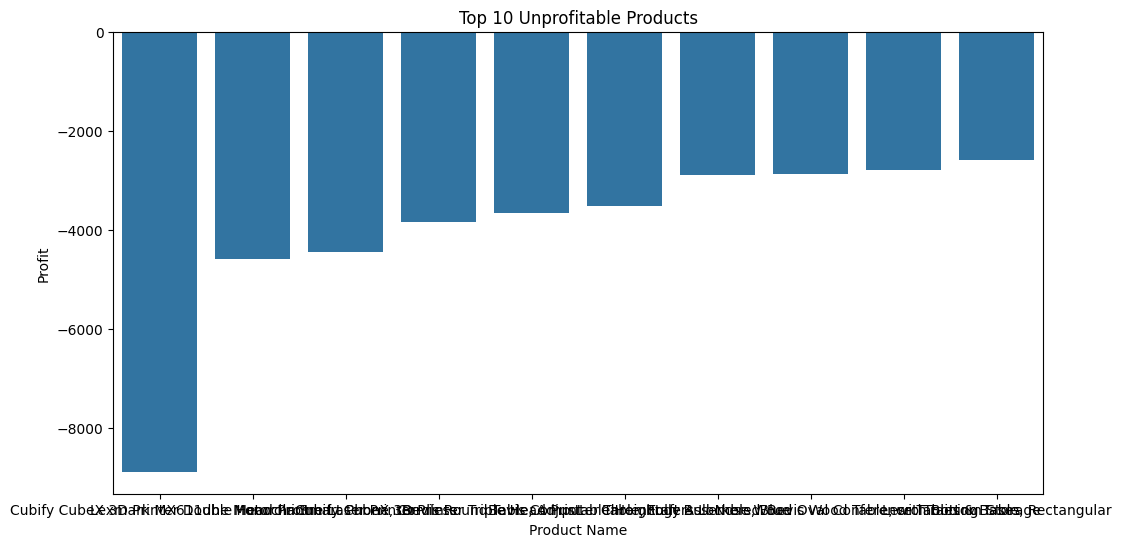

In [53]:
#unprofitable products
unprofitable_products = data[data['Profit'] < 0]        
print(unprofitable_products)
loss_products = data.groupby('Product Name')['Profit'].sum().reset_index().sort_values('Profit')
print(loss_products.head(5))
# visualize unprofitable products
plt.figure(figsize=(12,6))          
sns.barplot(x='Product Name', y='Profit', data=loss_products.head(10))
plt.title('Top 10 Unprofitable Products')
plt.show()

In [56]:
#customer analysis 
total_customers = data['Customer ID'].nunique()
print("Total customers:", total_customers)
repeat_customers = data['Customer ID'].value_counts()
repeat_customers = repeat_customers[repeat_customers > 1].count()   
print("Repeat Customers:", repeat_customers)  
total_customers1 = data['Customer ID'].unique()  
print("total_customers1:" ,total_customers1)


Total customers: 1590
Repeat Customers: 1583
total_customers1: ['RH-19495' 'JR-16210' 'CR-12730' ... 'RC-9825' 'MG-7890' 'ZC-11910']


       Segment         Sales
0     Consumer  6.507949e+06
1    Corporate  3.824698e+06
2  Home Office  2.309855e+06


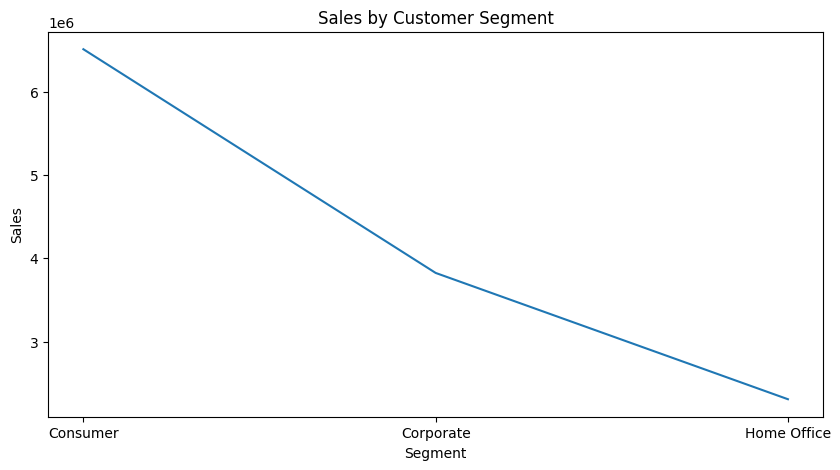

In [60]:
#customer segment 
sales_segment = data.groupby('Segment')['Sales'].sum().reset_index()
print(sales_segment)
plt.figure(figsize=(10,5))      
sns.lineplot(x='Segment', y='Sales', data=sales_segment)     
plt.title('Sales by Customer Segment')
plt.show()


In [61]:
# calculate the shipping delay 
data['shipping_delay'] = (data['Ship Date'] - data['Order Date']).dt.days
data['shipping_delay'] = data['shipping_delay'].apply(lambda x: x if x >= 0 else 0) 
print(data.head())

   Row ID         Order ID Order Date  Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891 2012-07-31 2012-07-31      Same Day    RH-19495   
1   26341    IN-2013-77878 2013-02-05 2013-02-07  Second Class    JR-16210   
2   25330    IN-2013-71249 2013-10-17 2013-10-18   First Class    CR-12730   
3   13524  ES-2013-1579342 2013-01-28 2013-01-30   First Class    KM-16375   
4   47221     SG-2013-4320 2013-11-05 2013-11-06      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

  Quantity  Discount    Profit Shipping Cost Order Priority  year month day  \
0        7   

In [ ]:
#identify shipping delay 
late_shipments = data[data['shipping_delay'] > 5]  
print(late_shipments.head())


     Row ID         Order ID Order Date  Ship Date       Ship Mode  \
8     40155   CA-2014-135909 2014-10-14 2014-10-21  Standard Class   
17    12069  ES-2014-1651774 2014-09-08 2014-09-14  Standard Class   
76    31806   CA-2012-145352 2012-03-16 2012-03-22  Standard Class   
84    18241  ES-2013-1434123 2013-01-29 2013-02-05  Standard Class   
100   46257     CG-2013-3470 2013-07-26 2013-08-01  Standard Class   

    Customer ID         Customer Name    Segment        City  \
8      JW-15220             Jane Waco  Corporate  Sacramento   
17     PJ-18835         Patrick Jones  Corporate       Prato   
76     CM-12385  Christopher Martinez   Consumer     Atlanta   
84     JB-16000             Joy Bell-   Consumer     Krefeld   
100     HM-4980     Henry MacAllister   Consumer    Kinshasa   

                      State  ... Quantity  Discount    Profit Shipping Cost  \
8                California  ...        5       0.2  1906.485        867.69   
17                  Tuscany  ...    

In [ ]:
# identify statistical summary of the cleaned data
data.describe(include='all')


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Quantity,Discount,Profit,Shipping Cost,Order Priority,year,month,day,profit_margin,shipping_delay
count,51290.00000,51290,51290,51290,51290,51290,51290,51290,51290,51290,...,51290.000000,51290.000000,51290.000000,51290.000000,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
unique,NaN,25035,NaN,NaN,4,1590,795,3,3636,1094,...,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN
top,NaN,CA-2014-100111,NaN,NaN,Standard Class,PO-18850,Muhammed Yedwab,Consumer,New York City,California,...,NaN,NaN,NaN,NaN,Medium,NaN,NaN,NaN,NaN,NaN
freq,NaN,14,NaN,NaN,30775,97,108,26518,915,2001,...,NaN,NaN,NaN,NaN,29433,NaN,NaN,NaN,NaN,NaN
mean,25645.50000,NaN,2013-05-11 21:26:49.155781120,2013-05-15 20:42:42.745174528,NaN,NaN,NaN,NaN,NaN,NaN,...,3.476545,0.142908,28.610982,26.375915,NaN,2012.777208,7.522636,15.782960,4.742960,3.969370
min,1.00000,NaN,2011-01-01 00:00:00,2011-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,-6599.978000,0.000000,NaN,2011.000000,1.000000,1.000000,-473.354185,0.000000
25%,12823.25000,NaN,2012-06-19 00:00:00,2012-06-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,0.000000,0.000000,2.610000,NaN,2012.000000,5.000000,8.000000,0.000000,3.000000
50%,25645.50000,NaN,2013-07-08 00:00:00,2013-07-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,0.000000,9.240000,7.790000,NaN,2013.000000,8.000000,16.000000,16.917784,4.000000
75%,38467.75000,NaN,2014-05-22 00:00:00,2014-05-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,5.000000,0.200000,36.810000,24.450000,NaN,2014.000000,10.000000,23.000000,33.313913,5.000000
max,51290.00000,NaN,2014-12-31 00:00:00,2015-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,14.000000,0.850000,8399.976000,933.570000,NaN,2014.000000,12.000000,31.000000,50.000000,7.000000
